In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import nltk
import string
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from collections import Counter
from collections import defaultdict
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
stopwords += ['im', 'amp', 'get', 'one','2','would','dont'] #otras palabras de propia eleccion



[nltk_data] Downloading package stopwords to /home/pablo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("dataset/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [3]:
#Convierto el texto de a String

df['text'] = df['text'].astype("string")

#Divido en palabras en una nueva columna y asigno la cantidad de palabras por cada tweet
df['palabras'] = df['text'].str.split().str.len()
df

,id,keyword,location,text,target,palabras
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19


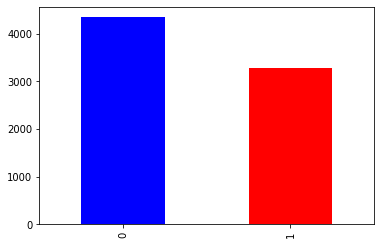

In [4]:
#Cantidad de filas de tweets que hablan de desastres naturales y los que no .
df['target'].value_counts().plot.bar(color=(['blue','red']))

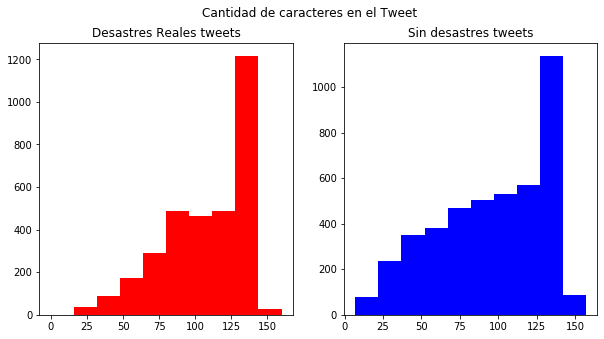

In [5]:
#Analizo distribucion de la cantidad de caracteres para ambos grupos
dfreal = df[df['target']==1]
dffalso = df[df['target']==0]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
dfreal_graph=df[df['target']==1]['text'].str.len()
ax1.hist(dfreal_graph,range=(0,160),color='red')
ax1.set_title('Desastres Reales tweets')
dffalso_graph=df[df['target']==0]['text'].str.len()
ax2.hist(dffalso_graph,color='blue')
ax2.set_title('Sin desastres tweets')
fig.suptitle('Cantidad de caracteres en el Tweet')
plt.show()

In [6]:
display(dfreal.text.str.len().describe())
dffalso.text.str.len().describe()

count    3271.000000
mean      108.113421
std        29.309854
min        14.000000
25%        88.000000
50%       115.000000
75%       136.000000
max       151.000000
Name: text, dtype: float64

count    4342.000000
mean       95.706817
std        35.885924
min         7.000000
25%        68.000000
50%       101.000000
75%       130.000000
max       157.000000
Name: text, dtype: float64

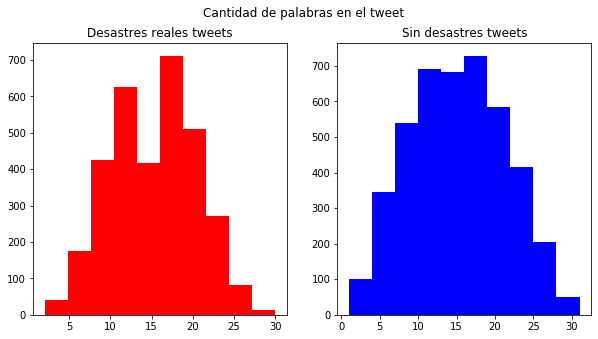

In [7]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
dfreal_graph2=df[df['target']==1]['palabras']
ax1.hist(dfreal_graph2,color='red')
ax1.set_title('Desastres reales tweets')
dffalso_graph2=df[df['target']==0]['palabras']
ax2.hist(dffalso_graph2,color='blue')
ax2.set_title('Sin desastres tweets')
fig.suptitle('Cantidad de palabras en el tweet')
plt.show()

In [8]:
#Analizamos longitud, promedio, de los tweets falsos y cantidad de palabras.
df[df['target']==0]['palabras'].describe()

count    4342.000000
mean       14.704744
std         6.161564
min         1.000000
25%        10.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: palabras, dtype: float64

In [9]:
#Analizamos longitud, promedio, de los tweets reales y cantidad de palabras.
df[df['target']==1]['palabras'].describe()

count    3271.000000
mean       15.167533
std         5.096806
min         2.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        30.000000
Name: palabras, dtype: float64

In [10]:
#EN ESTE PRIMER ANALISIS SE VERIFICA QUE EXISTE UNA TENDENCIA A QUE LOS TWEETS CON MAYOR LONGITUD SEAN FALSOS
#COMO TAMBIEN EL PROMEDIO DE MAYOR CANTIDAD DE PALABRAS PARA LOS TWEETS FALSOS.

In [11]:
#ANALIZAMOS LAS PALABRAS CON MAYOR APARICIONES EN AMBOS GRUPOS

In [12]:
#Caracteres de puntuacion
signos = string.punctuation

#Contador de simbolos
def contador_simbolos(dic,texto):
    for i in (texto):
        if i in signos:
            dic[i]+=1
    return dic

#Crea una lista de palabras segun el target para su posterior conteo
def creo_list_palabras(target):
    lista_palabras=[]
    
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            lista_palabras.append(i)
    return lista_palabras

#Crea una lista de palabras segun el target sin palabras "vacias"
def creo_list_sin_vacias(target):
    lista_palabras=[]
    
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            if (i not in stopwords) :
                lista_palabras.append(i)
    return lista_palabras

# Dada una lista de palabras, retira cualquiera que este en la lista de palabras funcionales.
def quitarPalabrasvac(listaPalabras, palabrasvac):
    return [w for w in listaPalabras if w not in palabrasvac]

#Funcion eliminar signos
re_punc = re.compile('[%s]' % re.escape(string.punctuation)) #separo cada signo
# eliminar la puntuación de cada palabra

def eliminar_puntuacion(text):
    reemplazados = [re_punc.sub('', w) for w in text]
    return reemplazados


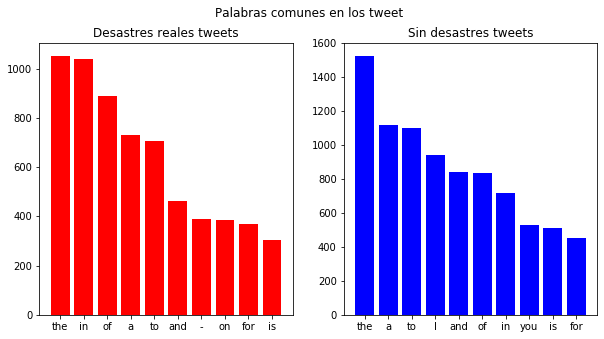

In [13]:
palabras_falsos = creo_list_palabras(0)
palabras_reales = creo_list_palabras(1)
top_falsos = Counter(palabras_falsos).most_common(10)
top_reales = Counter(palabras_reales).most_common(10)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
x,y=zip(*top_reales)
x2,y2=zip(*top_falsos)
ax1.bar(x,y,color='red')
ax1.set_title('Desastres reales tweets')
ax2.bar(x2,y2,color='blue')
ax2.set_title('Sin desastres tweets')
fig.suptitle('Palabras comunes en los tweet')
plt.show()

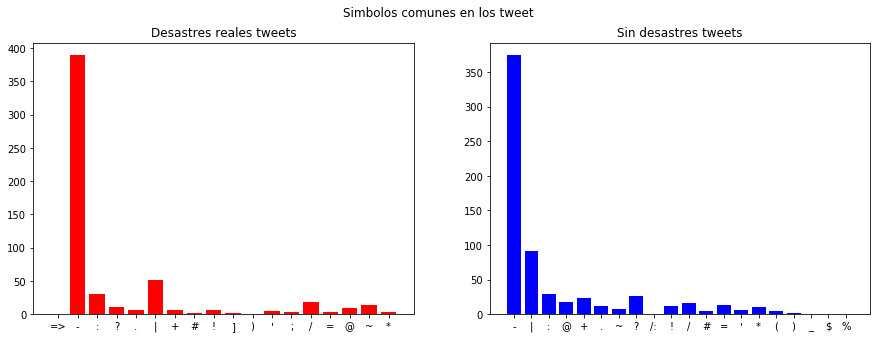

In [14]:
dic1=defaultdict(int)
dic2=defaultdict(int)
simbolos_reales=contador_simbolos(dic1,palabras_reales)
simbolos_falsos=contador_simbolos(dic2,palabras_falsos)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

x1,y1=zip(*simbolos_reales.items())
x2,y2=zip(*simbolos_falsos.items())
ax1.bar(x1,y1,color='red')
ax1.set_title('Desastres reales tweets')
ax2.bar(x2,y2,color='blue')
ax2.set_title('Sin desastres tweets')
fig.suptitle('Simbolos comunes en los tweet')

plt.show()

In [15]:
## conclusion

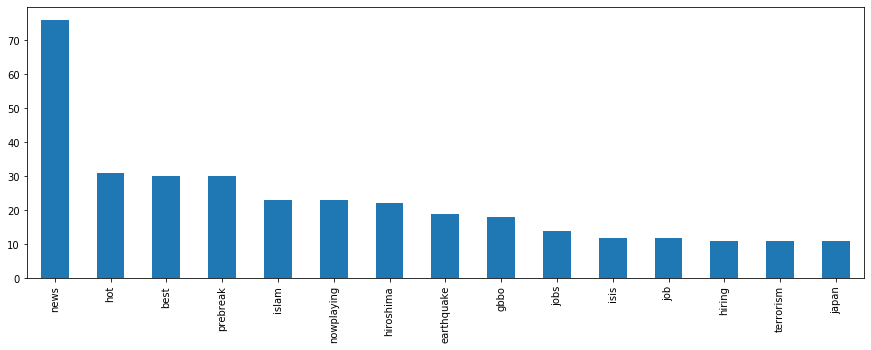

In [16]:
#Analizo hashtags

#convierto a minusculas
df['text'] = df['text'].str.lower()

# Busco hashtags con regex
df['hashtags'] = df['text'].map(lambda x: re.findall(r"#(\w+)", x))

# Flatten hastags list and print most common
hashtags = pd.Series([tag for hashtags in df['hashtags'] for tag in hashtags])

plt.figure(figsize=(15,5))
hashtags.value_counts().head(15).plot.bar()

Hashtags en los Tweets con Desastres Reales


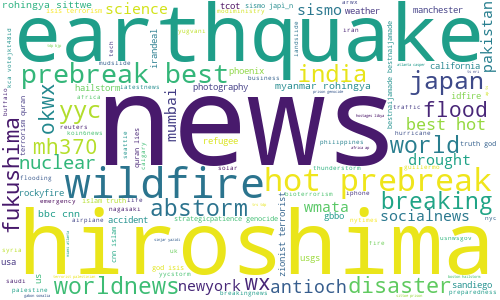

In [17]:
hashtags_reales = pd.Series([tag for hashtags in df[df['target'] == 1]['hashtags'] for tag in hashtags])
wordcloud = WordCloud(background_color='white', width=500, height=300).generate(' '.join(hashtags_reales))
print('Hashtags en los Tweets con Desastres Reales')
wordcloud.to_image()

Hashtags en los Tweets Sin Desastres


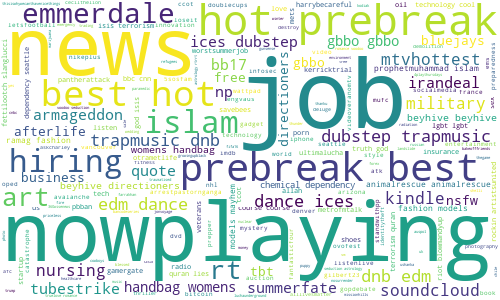

In [18]:
hashtags_falsos = pd.Series([tag for hashtags in df[df['target'] == 0]['hashtags'] for tag in hashtags])
wordcloud = WordCloud(background_color='white', width=500, height=300).generate(' '.join(hashtags_falsos))
print('Hashtags en los Tweets Sin Desastres')
wordcloud.to_image()

In [19]:
# Conclusion: los tweets de desastres reales contienen palabras agresivas que expresan sentimientos negativos.

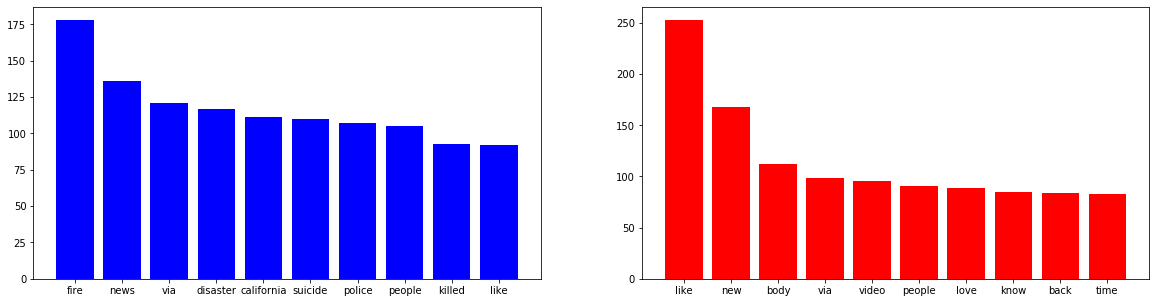

In [20]:
#Analizo los tweets obviando las palabras "vacias".

# 1ero CONVIERTO A MINUSCULAS TODOS LOS CARACTERES
df['text'] = df['text'].str.lower()

# 2do elimino urls
def borrar_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['text']=df['text'].apply(lambda x : borrar_url(x))

# 3ro elimino signos de puntuacion
def borrar_puntuacion(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df['text']=df['text'].apply(lambda x : borrar_puntuacion(x))

# 4to creo la lista sin palabras vacias.

palabras_falsos_full = creo_list_sin_vacias(0)
palabras_reales_full = creo_list_sin_vacias(1)

top_falsos_sin = Counter(palabras_falsos_full).most_common(10)
top_reales_sin = Counter(palabras_reales_full).most_common(10)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
x,y=zip(*top_reales_sin)
x2,y2=zip(*top_falsos_sin)
ax1.bar(x,y,color='blue')
ax2.bar(x2,y2,color='red')
plt.show()


In [21]:
#Conclusion palabras que aparecieron

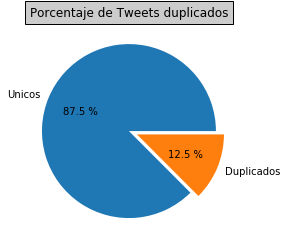

In [22]:
#Verifico si existen comentarios duplicados
duplicados = df[df['text'].duplicated(keep=False)] #selecciono todas sus apariciones
tweets = [df.shape[0]-duplicados.shape[0], duplicados.shape[0]]
nombres = ["Unicos","Duplicados"]
desfase = (0, 0.1)



plt.pie(tweets, labels=nombres,autopct="%0.1f %%", explode=desfase)
plt.title("Porcentaje de Tweets duplicados",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [23]:
#Observamos que el porcentaje de comentarios duplicados es superior al 10% lo que parece significativo.
#Veamos algunas filas
display(duplicados.head(50))

,id,keyword,location,text,target,palabras,hashtags
40,59,ablaze,Live On Webcam,check these out nsfw,0,8,[nsfw]
48,68,ablaze,Live On Webcam,check these out nsfw,0,8,[nsfw]
104,151,aftershock,Switzerland,320 ir icemoon aftershock djicemoon dubste...,0,16,"[dubstep, trapmusic, dnb, edm, dance, ices]"
106,156,aftershock,US,320 ir icemoon aftershock djicemoon dubste...,0,16,"[dubstep, trapmusic, dnb, edm, dance, ices]"
113,163,aftershock,Belgium,aftershock,0,2,[]
114,164,aftershock,Switzerland,320 ir icemoon aftershock djicemoon dubste...,0,16,"[dubstep, trapmusic, dnb, edm, dance, ices]"
115,165,aftershock,US,320 ir icemoon aftershock djicemoon dubste...,0,16,"[dubstep, trapmusic, dnb, edm, dance, ices]"
116,168,aftershock,NaN,320 ir icemoon aftershock djicemoon dubste...,0,16,"[dubstep, trapmusic, dnb, edm, dance, ices]"
118,171,aftershock,Switzerland,320 ir icemoon aftershock djicemoon dubste...,0,16,"[dubstep, trapmusic, dnb, edm, dance, ices]"
119,172,aftershock,Switzerland,320 ir icemoon aftershock djicemoon dubste...,0,16,"[dubstep, trapmusic, dnb, edm, dance, ices]"


In [24]:
#Se puede visualizar que en varios casos el mismo texto esta asociado a un tweet real y falso a la vez.
#Veamos cuales y cuantos son
dupli_desastres= duplicados[duplicados['target']==1][['id','text','target']]
dupli_sindesastres = duplicados[duplicados['target']==0][['id','text','target']]

dupli_join = dupli_desastres.merge(dupli_sindesastres, how="inner", on="text")

dupli_agrupados = dupli_join.groupby(['text'])['text'].agg([('Count' , 'count')]).reset_index()

display(dupli_agrupados)
print("Cantidad de comentarios con target contradictorio:", dupli_agrupados['Count'].sum(),"")



,text,Count
0,cindy noonancindynoonanheartbreak in baltimo...,1
1,new ladies shoulder tote handbag faux leather...,2
2,2pcs 18w cree led work light offroad lamp car...,3
3,360wisenews chinas stock market crash are the...,4
4,a look at state actions a year after fergusons...,4
...,...,...
63,why are you deluged with low selfimage take th...,1
64,world annihilation vs self transformation ali...,1
65,world fedex no longer to transport bioterror g...,1
66,world war ii book lightning joe an autobiograp...,1


Cantidad de comentarios con target contradictorio: 265 


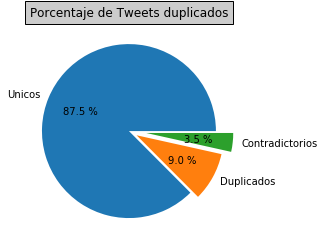

In [25]:
#Verifico si existen comentarios duplicados
lista_dupli = dupli_agrupados['text'].tolist()
dupli_contradice = dupli_agrupados['Count'].sum()
tweets = [df.shape[0]-duplicados.shape[0], duplicados.shape[0]-dupli_contradice, dupli_contradice]
nombres = ["Unicos","Duplicados","Contradictorios"]
desfase = (0,0.1, 0.2)



plt.pie(tweets, labels=nombres,autopct="%0.1f %%", explode=desfase)
plt.title("Porcentaje de Tweets duplicados",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [26]:
#Si bien no es una cantidad significativa, concluimos que contamina el set de datos, por lo tanto se eliminan.
df = df.drop(df[df['text'].isin(lista_dupli)].index)

#Con respecto a los comentarios duplicados que no poseen contradicciones en el target, 
# solo nos quedaremos con 1 aparicion.
df = df.drop(df[df['text'].duplicated(keep="first")].index)
